# Лабораториска Вежба 4
## Надгледувано учење: Класификација

Classification problem (multiclass) <br>

It has 16 attributes and 20000 samples. In the dataset we have information about different pixels which are taken from the 26 letters of the English alphabet. And its goal is to predict which letter is every sample. <br>

Information about the attributes: <br>

	 1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)


Every attribute has numeric values, except the target column which has categorical values.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

## Feature Selection

In [2]:
feature_names = ["lettr", "x-box", "y-box", "width", "height", "onpix", "x-bar",
                 "y-bar", "x2bar", "y2bar", "xybar", "x2ybar", "xy2bar", "x-ege",
                 "xegvy", "y-ege", "yegvx"]
data = pd.read_csv('/content/drive/MyDrive/MU/lab4/letter-recognition.data', sep=',', header=None, names=feature_names)
data

lettr  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
0         T      2      8      3       5      1      8     13      0      6   
1         I      5     12      3       7      2     10      5      5      4   
2         D      4     11      6       8      6     10      6      2      6   
3         N      7     11      6       6      3      5      9      4      6   
4         G      2      1      3       1      1      8      6      6      6   
...     ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
19995     D      2      2      3       3      2      7      7      7      6   
19996     C      7     10      8       8      4      4      8      6      9   
19997     T      6      9      6       7      5      6     11      3      7   
19998     S      2      3      4       2      1      8      7      2      6   
19999     A      4      9      6       6      2      9      5      3      1   

       xybar  x2ybar  xy2bar  x-ege  xegvy  y-ege  yegvx  
0          6      10       8      0      8      0      8  
1         13       3       9      2      8      4     10  
2         10       3       7      3      7      3      9  
3          4       4      10      6     10      2      8  
4          6       5       9      1      7      5     10  
...      ...     ...     ...    ...    ...    ...    ...  
19995      6       6       4      2      8      3      7  
19996     12       9      13      2      9      3      7  
19997     11       9       5      2     12      2      4  
19998     10       6       8      1      9      5      8  
19999      8       1       8      2      7      2      8  

[20000 rows x 17 columns]

In [3]:
classes = data['lettr'].unique()
num_classes = len(classes)
print('Number of target classes: ', num_classes)
print('Target classes: ', classes)

Number of target classes:  26
Target classes:  ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']


In [4]:
features = data.columns[1:]
num_features = len(features)
print('Number of features:', num_features)
print('Feature names:', features)

Number of features: 16
Feature names: Index(['x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'x-ege', 'xegvy', 'y-ege',
       'yegvx'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
data['lettr'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: lettr, dtype: int64

## Visualization

<ipython-input-7-3f52f276194e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


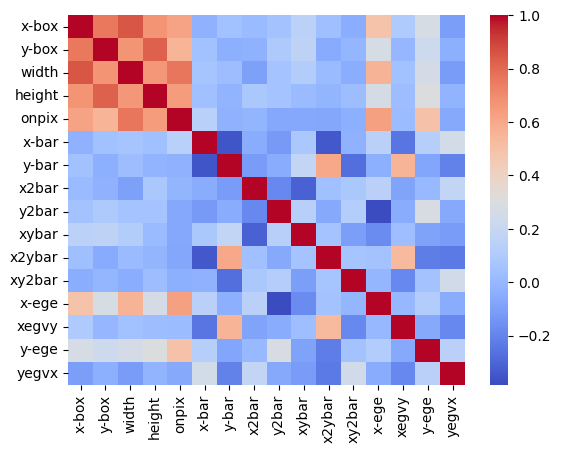

In [7]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

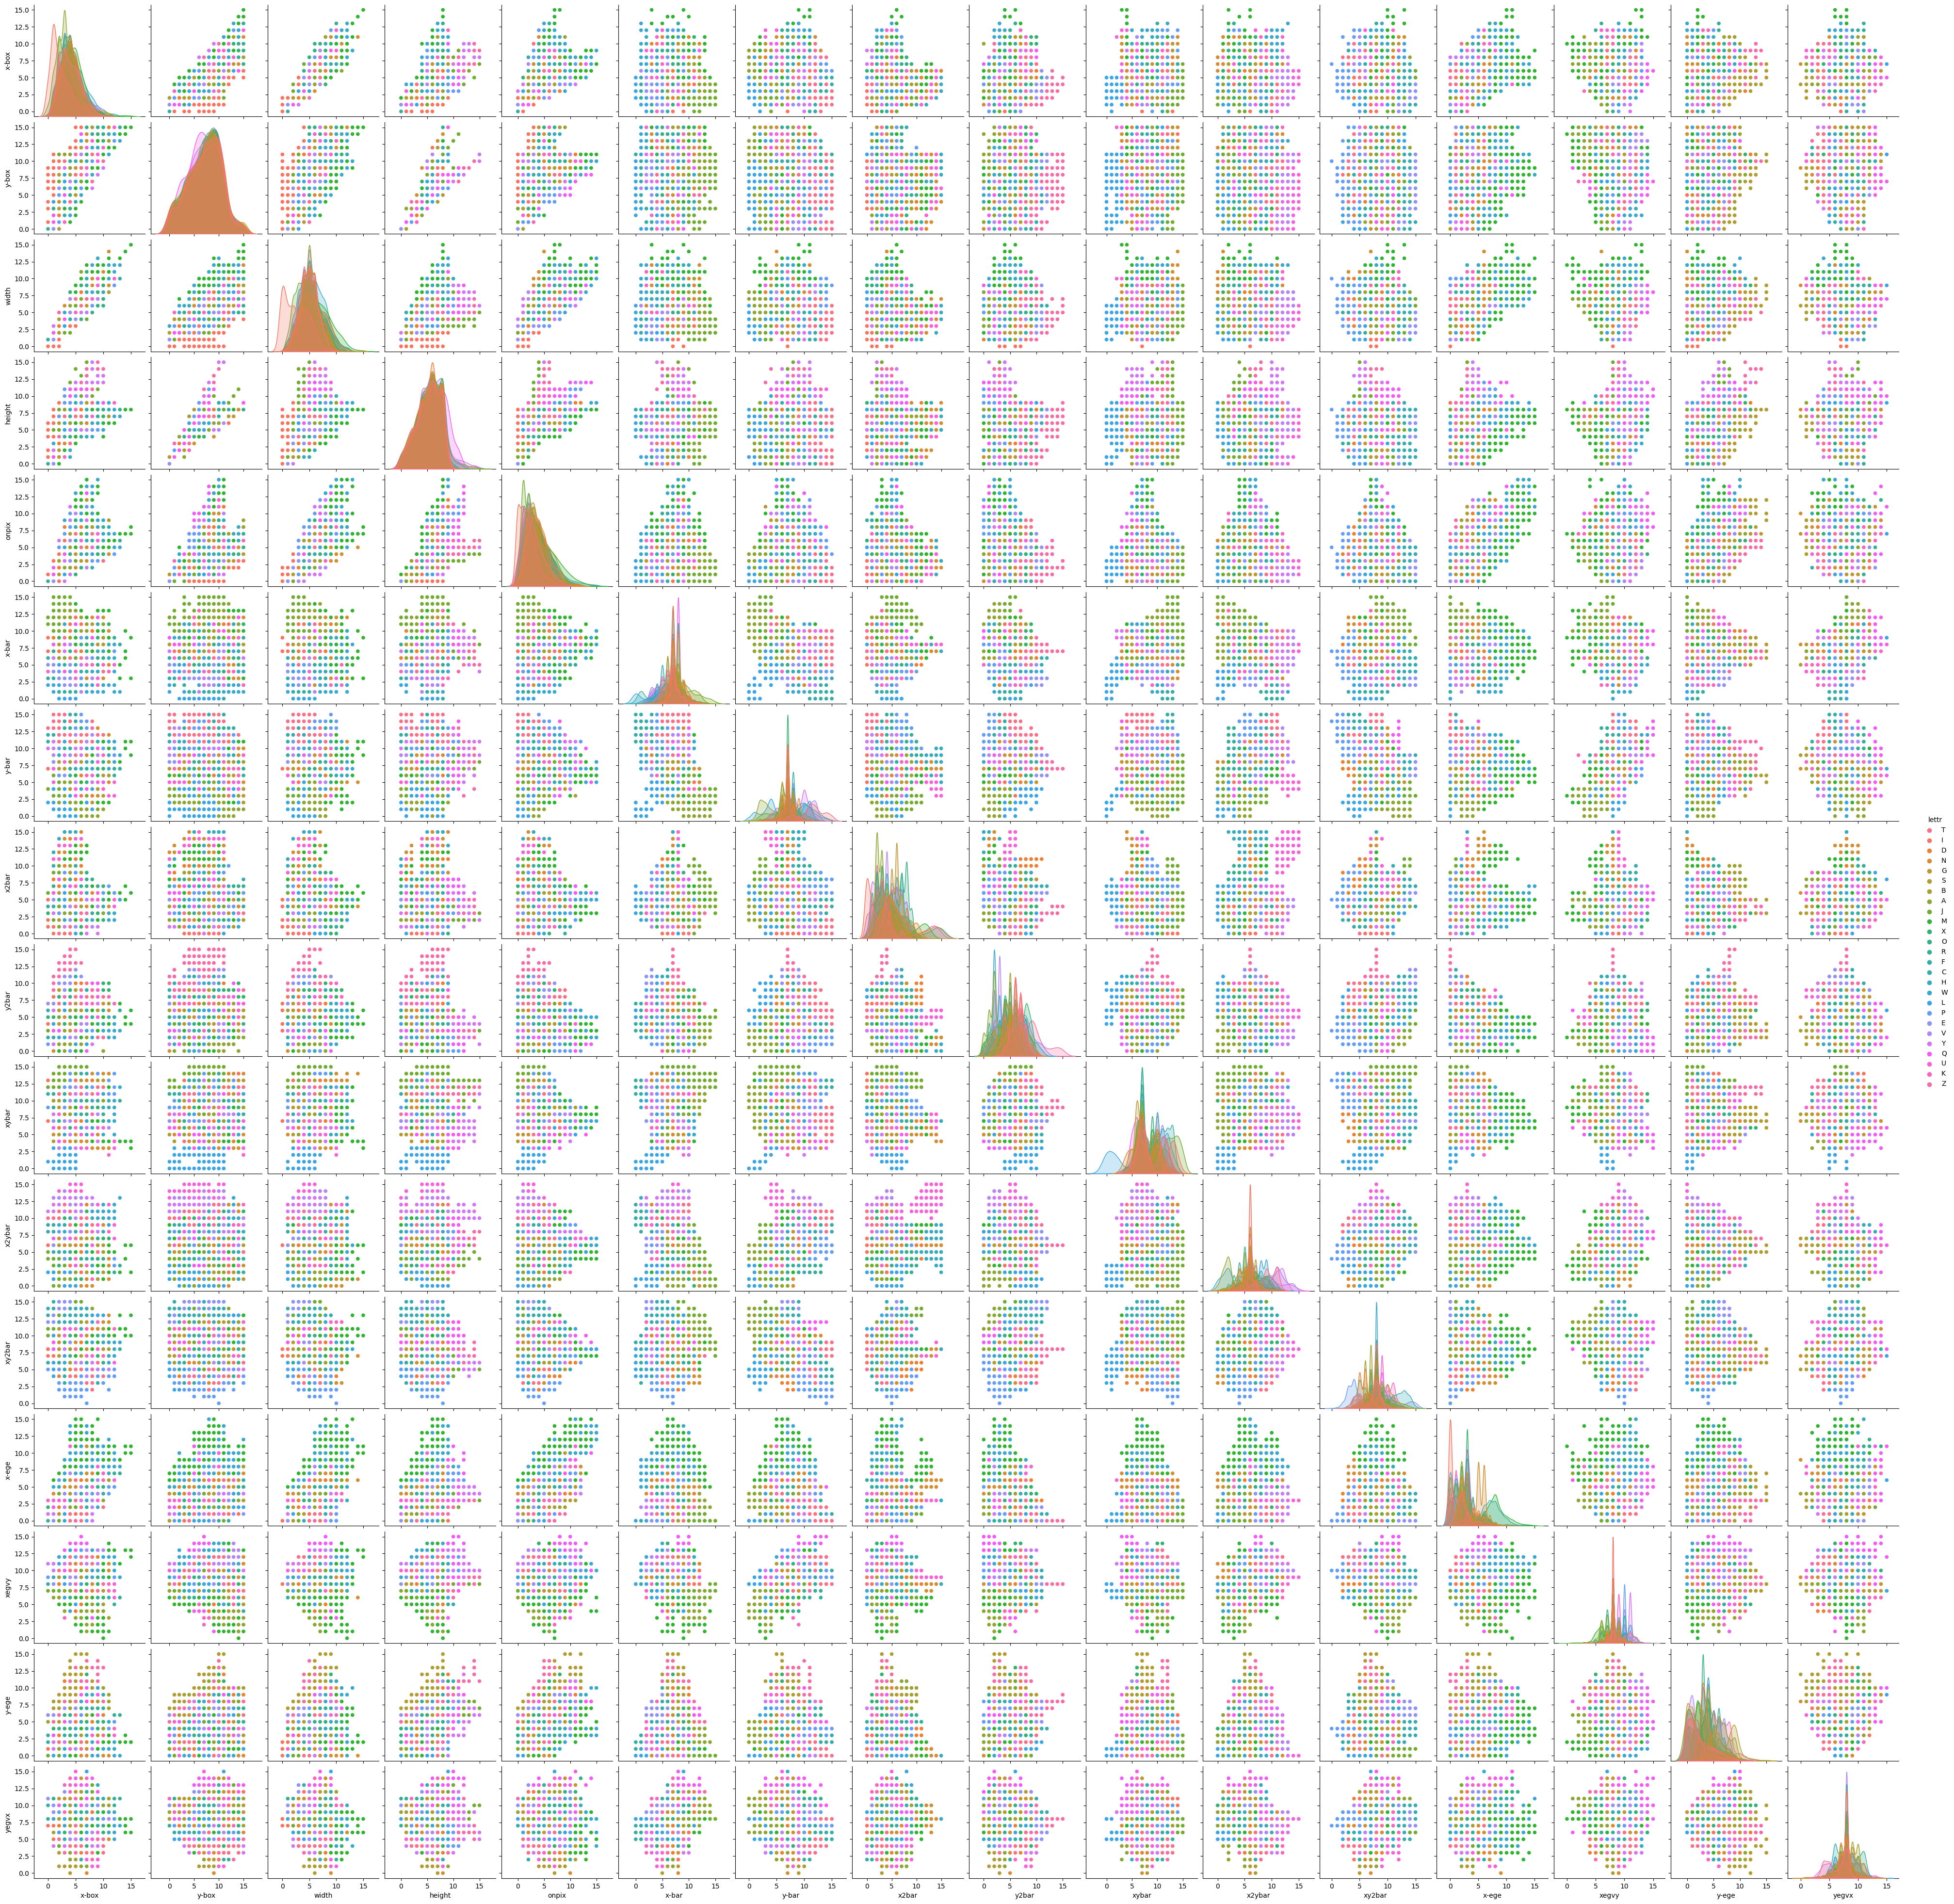

In [8]:
sns.pairplot(data,hue='lettr')

## Classification Models

Splitting the data 80/20

In [9]:
X_train = data.drop('lettr', axis=1)
X_test = data['lettr']

X_train, X_test, y_train, y_test = train_test_split(X_train, X_test, test_size=0.2)

Scaling the features so they can be in the range from 0 to 1

In [10]:
scaler = preprocessing.MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### LDA

I use the method <font color="orange">
  average='weighted'
</font> because it calculates the metrics for each label and takes into account label imbalance.

In [11]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

print("Linear Discriminant Analysis")

accuracy = accuracy_score(y_test, y_pred_lda)
print('Accuracy:  ', np.round(accuracy, 3))

precision = precision_score(y_test, y_pred_lda, average='weighted')
print("Precision: ", np.round(precision, 3))

recall = recall_score(y_test, y_pred_lda, average='weighted')
print("Recall:    ", np.round(recall, 3))

f1 = f1_score(y_test, y_pred_lda, average='weighted')
print("F1 score:  ", np.round(f1, 3))

Linear Discriminant Analysis
Accuracy:   0.701
Precision:  0.715
Recall:     0.701
F1 score:   0.702


In [12]:
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           A       0.82      0.83      0.82       160
           B       0.57      0.69      0.62       171
           C       0.67      0.74      0.71       148
           D       0.70      0.76      0.73       160
           E       0.62      0.46      0.53       157
           F       0.68      0.76      0.72       145
           G       0.48      0.43      0.46       159
           H       0.42      0.45      0.44       131
           I       0.80      0.85      0.82       138
           J       0.84      0.69      0.76       156
           K       0.62      0.66      0.64       151
           L       0.95      0.69      0.80       163
           M       0.87      0.85      0.86       144
           N       0.80      0.81      0.80       160
           O       0.65      0.67      0.66       159
           P       0.84      0.78      0.81       157
           Q       0.62      0.58      0.60       148
           R       0.63    

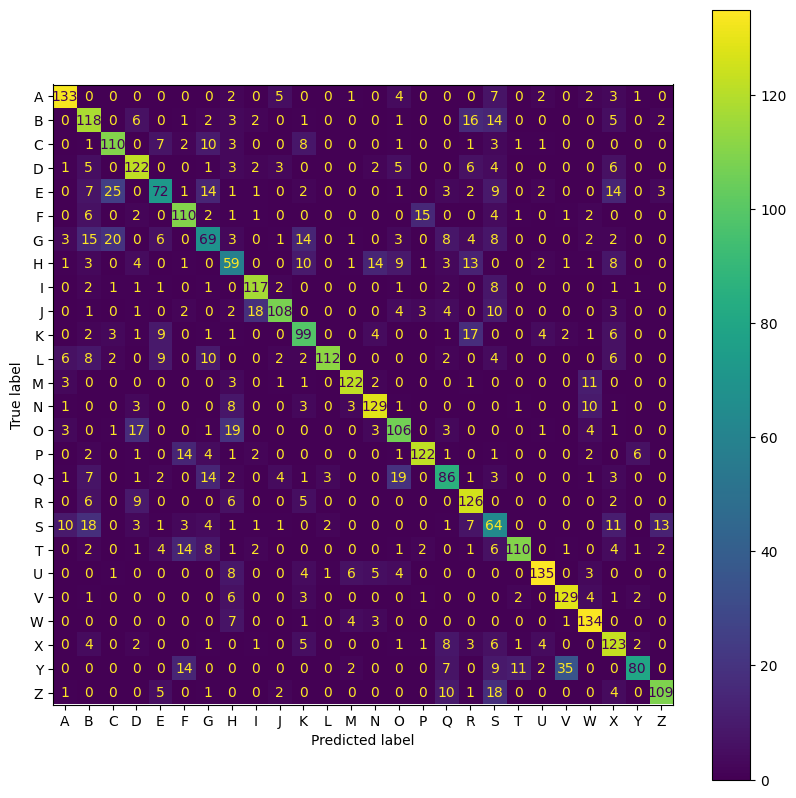

In [13]:
fig_lda, axs_lda = plt.subplots(1, figsize=(10,10))
disp_lda = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_lda, labels=lda.classes_, ax=axs_lda)

It gives good results, but it still makes mistakes on letters that aren't similiar, like 'O' and 'H', or 'T' and 'F'.

### QDA

In [14]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

y_pred_qda = qda.predict(X_test)

print("Quadriatic Discriminant Analysis")

accuracy = accuracy_score(y_test, y_pred_qda)
print('Accuracy:  ', np.round(accuracy, 3))

precision = precision_score(y_test, y_pred_qda, average='weighted')
print("Precision: ", np.round(precision, 3))

recall = recall_score(y_test, y_pred_qda, average='weighted')
print("Recall:    ", np.round(recall, 3))

f1 = f1_score(y_test, y_pred_qda, average='weighted')
print("F1 score:  ", np.round(f1, 3))

Quadriatic Discriminant Analysis
Accuracy:   0.889
Precision:  0.892
Recall:     0.889
F1 score:   0.889


In [15]:
print(classification_report(y_test, y_pred_qda))

              precision    recall  f1-score   support

           A       0.99      0.94      0.96       160
           B       0.87      0.91      0.89       171
           C       0.88      0.91      0.89       148
           D       0.88      0.89      0.89       160
           E       0.90      0.83      0.87       157
           F       0.85      0.92      0.88       145
           G       0.83      0.89      0.86       159
           H       0.81      0.66      0.73       131
           I       0.95      0.91      0.93       138
           J       0.95      0.93      0.94       156
           K       0.81      0.85      0.83       151
           L       0.95      0.83      0.89       163
           M       0.90      0.96      0.93       144
           N       0.97      0.88      0.92       160
           O       0.86      0.94      0.89       159
           P       0.97      0.93      0.95       157
           Q       0.85      0.86      0.85       148
           R       0.78    

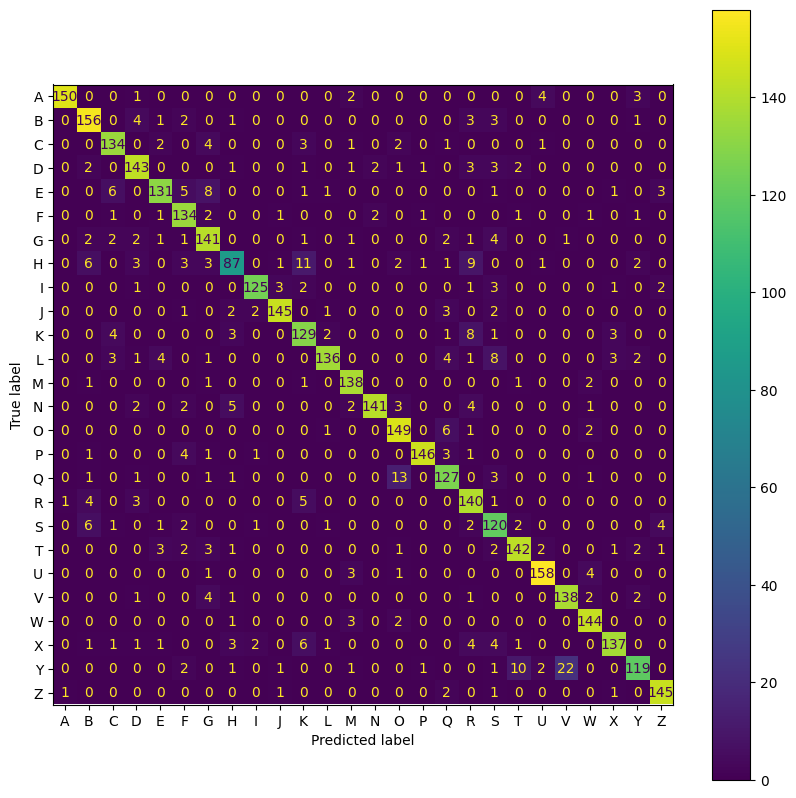

In [16]:
fig_qda, axs_qda = plt.subplots(1, figsize=(10,10))
disp_qda = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_qda, labels=qda.classes_, ax=axs_qda)

QDA gives slightly better results on account that it doesn't assume that the covariance matrices of the different classes should be equal.
That's why it can seperate the classes better and give good results.

### KNN

In [17]:
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbours")

accuracy = accuracy_score(y_test, y_pred_knn)
print('Accuracy:  ', np.round(accuracy, 3))

precision = precision_score(y_test, y_pred_knn, average='weighted')
print("Precision: ", np.round(precision, 3))

recall = recall_score(y_test, y_pred_knn, average='weighted')
print("Recall:    ", np.round(recall, 3))

f1 = f1_score(y_test, y_pred_knn, average='weighted')
print("F1 score:  ", np.round(f1, 3))

K-Nearest Neighbours
Accuracy:   0.94
Precision:  0.941
Recall:     0.94
F1 score:   0.94


In [18]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           A       0.99      0.98      0.98       160
           B       0.90      0.96      0.93       171
           C       0.93      0.93      0.93       148
           D       0.85      0.94      0.90       160
           E       0.91      0.93      0.92       157
           F       0.94      0.92      0.93       145
           G       0.91      0.92      0.91       159
           H       0.85      0.90      0.87       131
           I       0.92      0.97      0.95       138
           J       0.99      0.91      0.95       156
           K       0.91      0.83      0.87       151
           L       0.98      0.97      0.98       163
           M       0.95      0.97      0.96       144
           N       0.97      0.88      0.92       160
           O       0.93      0.94      0.93       159
           P       0.94      0.94      0.94       157
           Q       0.95      0.94      0.94       148
           R       0.88    

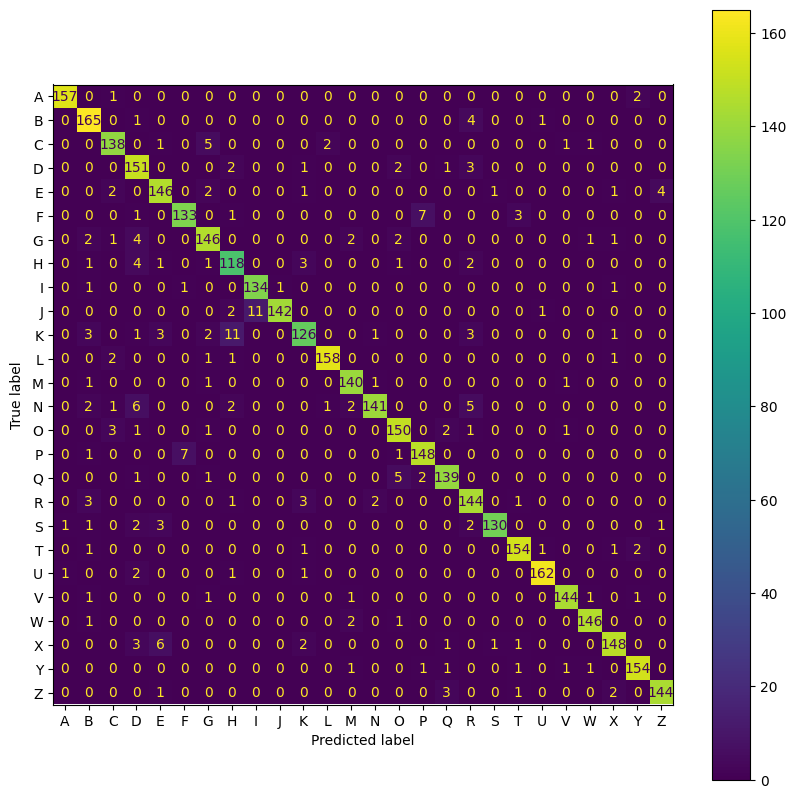

In [19]:
fig_knn, axs_knn = plt.subplots(1, figsize=(10,10))
disp_knn = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_knn, labels=knn.classes_, ax=axs_knn)

### SVC

In [20]:
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("Support Vector Classifier")

accuracy = accuracy_score(y_test, y_pred_svc)
print('Accuracy:  ', np.round(accuracy, 3))

precision = precision_score(y_test, y_pred_svc, average='weighted')
print("Precision: ", np.round(precision, 3))

recall = recall_score(y_test, y_pred_svc, average='weighted')
print("Recall:    ", np.round(recall, 3))

f1 = f1_score(y_test, y_pred_svc, average='weighted')
print("F1 score:  ", np.round(f1, 3))

Support Vector Classifier
Accuracy:   0.949
Precision:  0.951
Recall:     0.949
F1 score:   0.949


In [21]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           A       0.99      0.97      0.98       160
           B       0.90      0.96      0.93       171
           C       0.97      0.92      0.94       148
           D       0.90      0.96      0.93       160
           E       0.90      0.94      0.92       157
           F       0.93      0.99      0.96       145
           G       0.87      0.94      0.90       159
           H       0.88      0.85      0.86       131
           I       0.98      0.95      0.96       138
           J       0.98      0.94      0.96       156
           K       0.92      0.93      0.93       151
           L       0.99      0.91      0.95       163
           M       0.96      0.98      0.97       144
           N       1.00      0.90      0.95       160
           O       0.95      0.95      0.95       159
           P       0.99      0.93      0.96       157
           Q       0.95      0.95      0.95       148
           R       0.84    

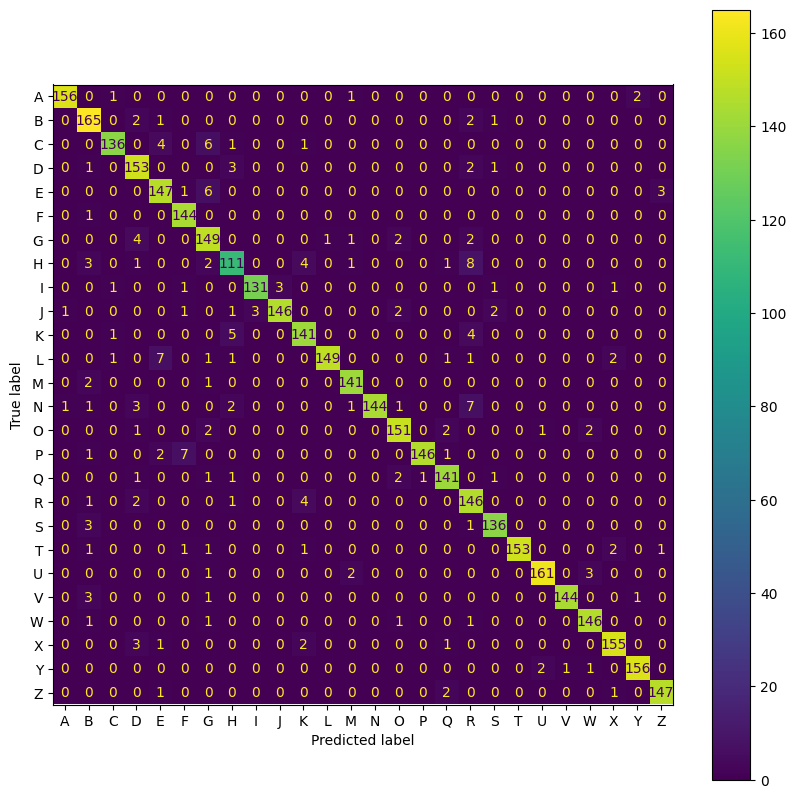

In [22]:
fig_svc, axs_svc = plt.subplots(1, figsize=(10,10))
disp_svc = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_svc, labels=svc.classes_, ax=axs_svc)

For example it doesn't predict the letters 'K' and 'R', but based on the font even a human can make a mistake with them. <br>
SVC gives better results than the last two models, because it uses a hyperparameter <font color="orange">gamma</font> which determines the influence of each training example on the decision boundary.

### MLP

<font color="orange">hidden_layer_sizes</font> - Default is 100 <br>

<font color="orange">solver</font> - used for weight optimization. In this case Stohastic Gradient Descent. <br>

<font color="orange">alpha</font> - Strength of the L2 Regularization. Default is 0.0001 <br>

<font color="orange">learning_rate</font> - Learning rate schedule for weight updates. 'Adaptive' is used in SGD. <br>It keeps the learning rate close to the value in **'learning_rate_init'** <br>

<font color="orange">max_iter</font> - Max number of iterations. Default is 200 <br>


In [23]:
nn = MLPClassifier(hidden_layer_sizes=(100), solver='sgd', alpha=0.001, learning_rate='adaptive',
                   learning_rate_init=0.2, max_iter=350)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

print("Neural Network - Multi Layer Perceptron")
accuracy = accuracy_score(y_test, y_pred_nn)
print("Accuracy:  ", np.round(accuracy, 3))

precision = precision_score(y_test, y_pred_nn, average='weighted')
print("Precision: ", np.round(precision, 3))

recall = recall_score(y_test, y_pred_nn, average='weighted')
print("Recall:    ", np.round(recall, 3))

f1 = f1_score(y_test, y_pred_nn, average='weighted')
print("F1 Score:  ", np.round(f1, 3))

Neural Network - Multi Layer Perceptron
Accuracy:   0.948
Precision:  0.949
Recall:     0.948
F1 Score:   0.949


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           A       0.99      0.97      0.98       160
           B       0.94      0.96      0.95       171
           C       0.95      0.93      0.94       148
           D       0.92      0.92      0.92       160
           E       0.94      0.95      0.95       157
           F       0.95      0.97      0.96       145
           G       0.91      0.94      0.93       159
           H       0.88      0.83      0.85       131
           I       0.92      0.96      0.94       138
           J       0.97      0.93      0.95       156
           K       0.90      0.92      0.91       151
           L       0.99      0.95      0.97       163
           M       0.93      0.97      0.95       144
           N       0.95      0.92      0.94       160
           O       0.96      0.94      0.95       159
           P       0.98      0.97      0.98       157
           Q       0.95      0.97      0.96       148
           R       0.87    

Text(0, 0.5, 'Loss')

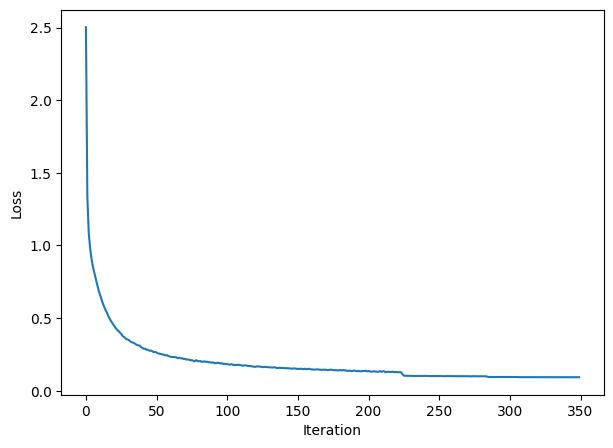

In [25]:
fig_nn, axs_nn = plt.subplots(1, figsize=(7, 5))
axs_nn.plot(nn.loss_curve_)
axs_nn.set_xlabel("Iteration")
axs_nn.set_ylabel("Loss")

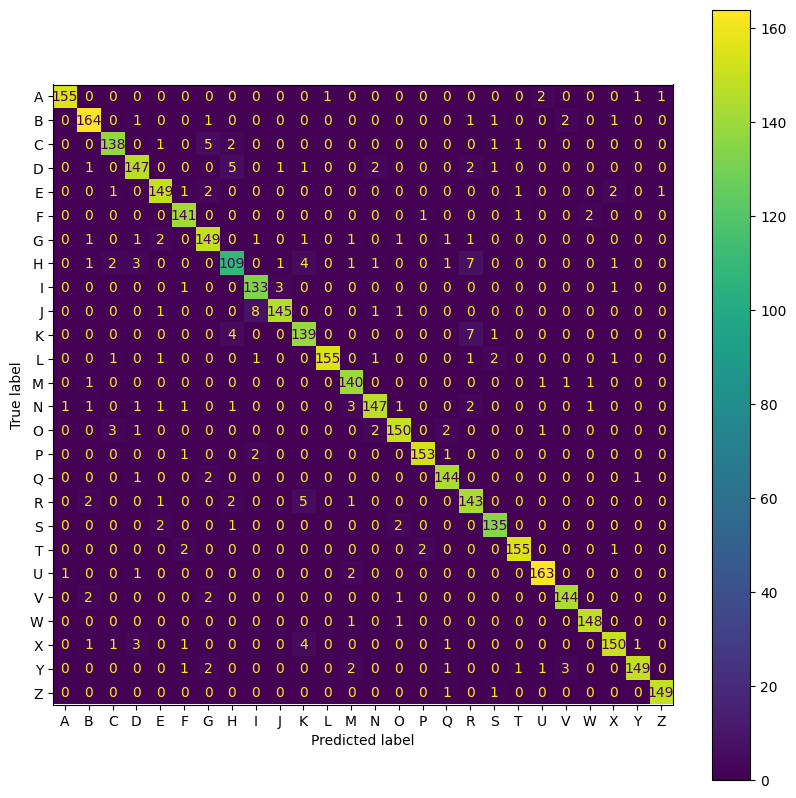

In [26]:
fig_nn2, axs_nn2 = plt.subplots(1, figsize=(10,10))
disp_nn = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_nn, labels=nn.classes_, ax=axs_nn2)

## Comparing Results

In [27]:
def get_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [28]:
pd.DataFrame([
              get_metrics(y_test, y_pred_lda),
              get_metrics(y_test, y_pred_qda),
              get_metrics(y_test, y_pred_knn),
              get_metrics(y_test, y_pred_svc),
              get_metrics(y_test, y_pred_nn)
             ],
    columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    index=['Linear Discriminant Analysis', 'Quadratic Discriminant Analysis',
           'K-Nearest Neighbour', 'Support Vector Classifier',  'Neural Networks'])

Accuracy  Precision   Recall  F1 Score
Linear Discriminant Analysis      0.70100   0.715132  0.70100  0.701889
Quadratic Discriminant Analysis   0.88875   0.891582  0.88875  0.888548
K-Nearest Neighbour               0.93950   0.940796  0.93950  0.939632
Support Vector Classifier         0.94875   0.950640  0.94875  0.949062
Neural Networks                   0.94850   0.948945  0.94850  0.948509

## Conclusion

Every model gives good results, meaning they seperate the classes well. <br>
The best results can be seen with the K-Nearest Neighbour, Support Vector Classifier and Neural Networks model.